# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer Vision is the practice of writing algorithsm which can discover patterns in visual data such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are fomr the Food 101 dataset. However, we've modified to use two classes (pizza and steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb 

> **Note**: We start with a smaller dataset so we can experiment quickly and figure out what works (or better yet what doesn't work before scaling up

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-05-10 02:41:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.167.128, 142.251.5.128, 2a00:1450:400c:c0b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.167.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  74.0MB/s    in 1.4s    

2022-05-10 02:41:56 (74.0 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project. This usually means visualizing many samples of data.

In [2]:
!ls pizza_steak

test  train


In [3]:
import os 

# Walk through pizza_steak directory and list number of files
for dirpath, dirname, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirname)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/steak'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/steak'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'


The extra file in our pizza_steak directory is ".DS_Store"

In [4]:
# Another way to find how many images in a directory
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [5]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [6]:
# Let's visualize our images 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we will view the images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1) # Randomly sample 1 of the items specified in target folder 

  # Read the image and plot using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img

Image shape: (262, 512, 3)


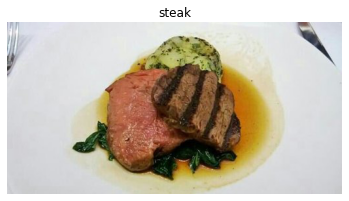

In [7]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

Image shape: (512, 512, 3)


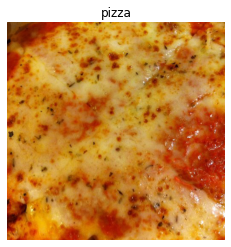

In [8]:
img_2 = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

In [9]:
import tensorflow as tf
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
tf.constant(img)

<tf.Tensor: shape=(262, 512, 3), dtype=uint8, numpy=
array([[[171, 170, 188],
        [193, 192, 210],
        [219, 221, 236],
        ...,
        [197, 201, 212],
        [190, 194, 205],
        [185, 189, 200]],

       [[173, 172, 190],
        [190, 191, 209],
        [216, 217, 235],
        ...,
        [206, 210, 221],
        [200, 204, 215],
        [196, 200, 211]],

       [[172, 173, 191],
        [190, 191, 209],
        [213, 214, 232],
        ...,
        [210, 214, 225],
        [207, 211, 222],
        [204, 208, 219]],

       ...,

       [[212, 213, 217],
        [209, 210, 214],
        [207, 208, 212],
        ...,
        [199, 201, 200],
        [199, 201, 200],
        [199, 201, 200]],

       [[211, 212, 216],
        [209, 210, 214],
        [208, 209, 213],
        ...,
        [199, 201, 200],
        [199, 201, 200],
        [200, 202, 201]],

       [[210, 211, 215],
        [209, 210, 214],
        [208, 209, 213],
        ...,
        [198, 200, 19

In [10]:
# View the image shape 
img.shape # returns width, height, colour channels

(262, 512, 3)

**Note**: Many Machine Learning models, including neural networks prefer values they work with to be 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred as **normalize**) their pixel values by dividing the image arrays by 255 (since 255 is the maximum pixel value)

In [11]:
# Get all the pixel values between 0 & 1 -> normalize them
img/255.

array([[[0.67058824, 0.66666667, 0.7372549 ],
        [0.75686275, 0.75294118, 0.82352941],
        [0.85882353, 0.86666667, 0.9254902 ],
        ...,
        [0.77254902, 0.78823529, 0.83137255],
        [0.74509804, 0.76078431, 0.80392157],
        [0.7254902 , 0.74117647, 0.78431373]],

       [[0.67843137, 0.6745098 , 0.74509804],
        [0.74509804, 0.74901961, 0.81960784],
        [0.84705882, 0.85098039, 0.92156863],
        ...,
        [0.80784314, 0.82352941, 0.86666667],
        [0.78431373, 0.8       , 0.84313725],
        [0.76862745, 0.78431373, 0.82745098]],

       [[0.6745098 , 0.67843137, 0.74901961],
        [0.74509804, 0.74901961, 0.81960784],
        [0.83529412, 0.83921569, 0.90980392],
        ...,
        [0.82352941, 0.83921569, 0.88235294],
        [0.81176471, 0.82745098, 0.87058824],
        [0.8       , 0.81568627, 0.85882353]],

       ...,

       [[0.83137255, 0.83529412, 0.85098039],
        [0.81960784, 0.82352941, 0.83921569],
        [0.81176471, 0

## End-to-end example

Let's build a convolutional neural network (CNN) to find patterns in our images, more specifically we a need a way to:
- Load our images
- Preprocess our images
- Build a CNN to find patterns in our images
- Compile our CNN
- Fit CNN to our training data

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed 
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches -- Read Documentation 
# It creates data and label automatically for us 
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(244,244),# 244,244 common shape
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(244,244),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(filters=10,
                             kernel_size=3,
                             activation="relu",
                             input_shape=(244,244,3)),
      tf.keras.layers.Conv2D(10,3,activation="relu"),
      tf.keras.layers.MaxPool2D(pool_size=2,
                                padding="valid"),
      tf.keras.layers.Conv2D(10,3,activation="relu"),
      tf.keras.layers.Conv2D(10,3),
      tf.keras.layers.Activation(tf.nn.relu), # We can setup the activation function like this, this will be the same as specifying the argument "activation" in Conv2D
      tf.keras.layers.MaxPool2D(pool_size=2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 11s 227ms/step - loss: 0.5772 - accuracy: 0.6707 - val_loss: 0.3935 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 11s 230ms/step - loss: 0.4183 - accuracy: 0.8080 - val_loss: 0.3988 - val_accuracy: 0.7920
Epoch 3/5
47/47 [==============================] - 11s 236ms/step - loss: 0.3639 - accuracy: 0.8467 - val_loss: 0.3202 - val_accuracy: 0.8880
Epoch 4/5
47/47 [==============================] - 11s 228ms/step - loss: 0.3299 - accuracy: 0.8640 - val_loss: 0.2932 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 10s 219ms/step - loss: 0.2345 - accuracy: 0.9133 - val_loss: 0.2956 - val_accuracy: 0.8700


**Note**: If the above cell is taking longer than 10 seconds per epoch, make sure you're using a GPU.

In [16]:
# Get a model summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 242, 242, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 240, 240, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 120, 120, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 118, 118, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 116, 116, 10)      910       
                                                                 
 activation_1 (Activation)   (None, 116, 116, 10)      0         
                                                      

Our Convolutional Neural Network has 36,651 parameters.

## Using the same model as before

Building this model from [TensorFlow Playground](http://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.52527&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [17]:
# Set random seed 
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(244,244,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 217ms/step - loss: 0.7261 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 210ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 210ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 11s 230ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 213ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [18]:
# Get the model 2 summary
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 178608)            0         
                                                                 
 dense_2 (Dense)             (None, 4)                 714436    
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 714,461
Trainable params: 714,461
Non-trainable params: 0
_________________________________________________________________


Our Dense (Fully-connected) model has 714,461 parameters. What is trainable parameters - these are learnable parameters that model can figure out during the training. 

**Note**: You can think of trainable parameters as patterns a model can learn from data. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, a convolutional neural network seeks to sort out and learn the most important patterns in an image. So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different features in an image.

In [20]:
# set the random seed
tf.random.set_seed(42)

# Create the model - lets upgrade it 
model_3 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(244,244,3)),
      tf.keras.layers.Dense(100, activation="relu"),
      tf.keras.layers.Dense(100, activation="relu"),
      tf.keras.layers.Dense(100, activation="relu"),
      tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 214ms/step - loss: 3.3432 - accuracy: 0.6180 - val_loss: 1.2325 - val_accuracy: 0.7060
Epoch 2/5
47/47 [==============================] - 10s 208ms/step - loss: 0.8113 - accuracy: 0.7227 - val_loss: 0.5506 - val_accuracy: 0.7760
Epoch 3/5
47/47 [==============================] - 10s 211ms/step - loss: 0.9344 - accuracy: 0.6993 - val_loss: 1.1348 - val_accuracy: 0.6720
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.9716 - accuracy: 0.6907 - val_loss: 0.8714 - val_accuracy: 0.6640
Epoch 5/5
47/47 [==============================] - 10s 210ms/step - loss: 0.6378 - accuracy: 0.7487 - val_loss: 0.6630 - val_accuracy: 0.6440


Whenever we see a ValueError that something about shape, most likely we have some sort of shape mismatch in the model architecture. In Deep Learning model, each layer output is subsequent layers input.

```
ValueError: `logits` and `labels` must have the same shape, received ((None, None, None, 1) vs (None,)).
```

In [21]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 178608)            0         
                                                                 
 dense_9 (Dense)             (None, 100)               17860900  
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
Total params: 17,881,201
Trainable params: 17,881,201
Non-trainable params: 0
_________________________________________________________________


We have **15 million parameters**, its 500 times larger than our CNN (Convolutional Neural Network), this is a great example of power of CNN (Convolutional Neural Networks).

## Binary Classification Example

1. Become one with the data
2. Preprocess the data
3. Create a model (Baseline model)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model 
7. Repeat until satisfied

### Step 1: Become One with the Data

Image shape: (385, 512, 3)
Image shape: (512, 512, 3)


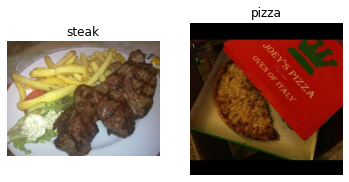

In [22]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### Step 2: Preprocess the Data

In [23]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Turn our data into **batches**.

A **batch** - is a small subset of our dataset that the model looks during the training. Rather than look at all ~10k images at one time, a model might only look at 32 at a time.

It does this for couple of reasons:
1. 10,000 (or more) images might not fit into the memory of processor (GPU)
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

In [24]:
!nvidia-smi

Tue May 10 03:25:16 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    33W / 250W |   5249MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

[ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

In [25]:
# Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalize (rescale) the images
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [26]:
# Load in our image data from directories and turn them into batches 
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(244,244), # Target size of images (height, width)
                                               class_mode="binary", # Type of data we're working with
                                               batch_size=32 # size of minibatches to load data into
                                              )

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(244,244),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [27]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the next batch of images/labels in train data
len(images), len(labels)

(32, 32)

In [28]:
# How many batches are there
len(train_data)

47

In [29]:
1500/32

46.875

In [30]:
# Get the first two images 
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [31]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### Step 3: Create a CNN model (Baseline Model)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> **Note**: In Deep Learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem

Resource to look for best performing models - [Papers with Code](https://paperswithcode.com/sota)

In [32]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

Baseline model

In [34]:
# Create the model
model_4 = Sequential([
      Conv2D(filters=10, # filters is the number of sliding windows going across an input (higher = more complex model)
             kernel_size=3, # the size of the sliding window going across an input
             strides=1, # the size of the step the sliding window takes across an input
             padding="valid", # if "same", output shape is same as input shape, if "valid" output shape gets compressed
             activation="relu",
             input_shape=(244,244,3)), # Input Layer (specify the input shape)
      Conv2D(10, 3, activation="relu"),
      Conv2D(10, 3, activation="relu"),
      Flatten(),
      Dense(1, activation="sigmoid") # Output Layer
])

In [35]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [36]:
# Get a summary of our model
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 242, 242, 10)      280       
                                                                 
 conv2d_13 (Conv2D)          (None, 240, 240, 10)      910       
                                                                 
 conv2d_14 (Conv2D)          (None, 238, 238, 10)      910       
                                                                 
 flatten_4 (Flatten)         (None, 566440)            0         
                                                                 
 dense_13 (Dense)            (None, 1)                 566441    
                                                                 
Total params: 568,541
Trainable params: 568,541
Non-trainable params: 0
_________________________________________________________________


### Step 4: Fit the model

In [37]:
# Check the lengths of training and test data generators 
len(train_data), len(test_data)

(47, 16)

In [38]:
# Fit the model
history_4 = model_4.fit(train_data, # Combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data), 
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 224ms/step - loss: 1.0601 - accuracy: 0.6873 - val_loss: 0.4523 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 10s 216ms/step - loss: 0.4315 - accuracy: 0.8180 - val_loss: 0.4624 - val_accuracy: 0.7760
Epoch 3/5
47/47 [==============================] - 10s 215ms/step - loss: 0.2979 - accuracy: 0.8873 - val_loss: 0.4041 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 10s 216ms/step - loss: 0.1241 - accuracy: 0.9627 - val_loss: 0.5082 - val_accuracy: 0.8100
Epoch 5/5
47/47 [==============================] - 10s 215ms/step - loss: 0.0407 - accuracy: 0.9913 - val_loss: 0.5330 - val_accuracy: 0.8160


### Steps 5: Evaluating the Model

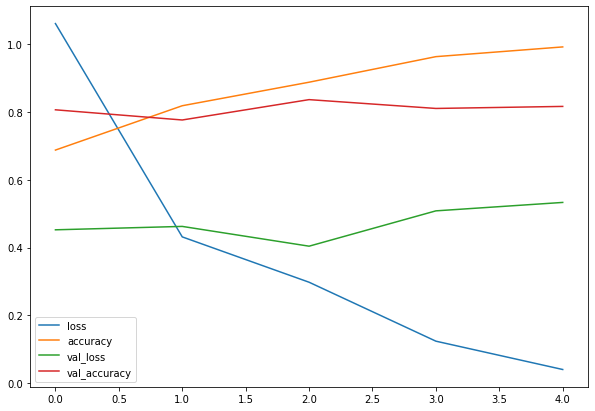

In [41]:
import pandas as pd
# Plot the trainnig curves
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [63]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend();

**Note**: When a validation loss starts to increase, it's likely that the model is *overfitting* the training dataset. This means it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be dimished.

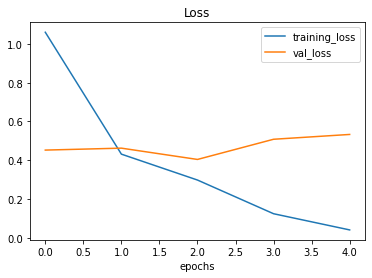

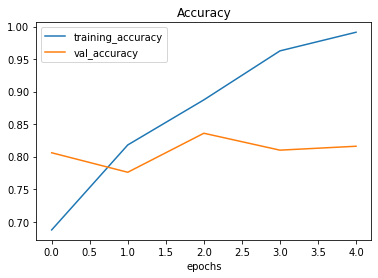

In [64]:
# Check out the loss and accuracty of model 4
plot_loss_curves(history_4)

### Step 6: Adjust the model parameters 

Fitting a Machine Learning model comes in 3 steps:
1. Create a baseline model 
2. Beat the baseline model by overfitting a larger model
3. Reduce overfitting

Ways to induce overfitting:
- Increase the number of conv layers
- Increase the number of filters
- Add another Dense layer to the output of our flattened layer

Reduce overfitting:
- Add data augmentation
- Add regularization layers (such as MaxPool2D)
- Add more data

**Note**: Reducing overfitting is also known as regularization.

In [51]:
# Create the model
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(244,244,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [47]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [48]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 217ms/step - loss: 0.6217 - accuracy: 0.6493 - val_loss: 0.5309 - val_accuracy: 0.7080
Epoch 2/5
47/47 [==============================] - 10s 213ms/step - loss: 0.4916 - accuracy: 0.7720 - val_loss: 0.4142 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 10s 212ms/step - loss: 0.4508 - accuracy: 0.7947 - val_loss: 0.3779 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 10s 211ms/step - loss: 0.4447 - accuracy: 0.8027 - val_loss: 0.3732 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 10s 213ms/step - loss: 0.4115 - accuracy: 0.8220 - val_loss: 0.3555 - val_accuracy: 0.8520


In [49]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 242, 242, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 121, 121, 10)     0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 119, 119, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 59, 59, 10)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 57, 57, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 28, 28, 10)      

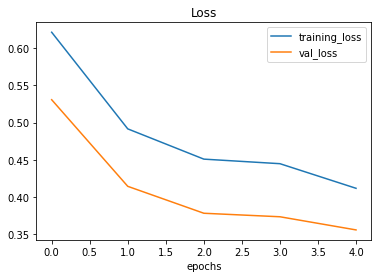

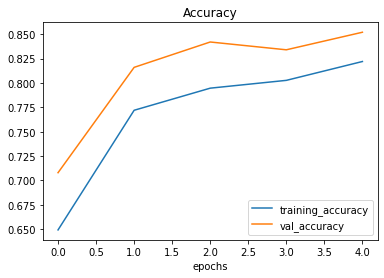

In [65]:
# Plot loss curves
plot_loss_curves(history_5)

### Data Augmentation

In [52]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image? 
                                             shear_range=0.2, # how much do you shear the image?
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your image around on the x-axis
                                             height_shift_range=0.3, # move your image around on the y-axis
                                             horizontal_flip=True) # do you want to flip an image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> Question: What is data augmentation?

Data augmentation is the process of altering our training data, leading it have more diversity and in turn allowing our models to learn mode generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

In [55]:
# Import data and augment it from the training directory
print("Augmented Training Data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(244,244),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # For demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented Training Data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(244,244),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non-augmented test data batches
print("Non-augmented Test Data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(244,244),
                                             batch_size=32,
                                             class_mode="binary")

Augmented Training Data
Found 1500 images belonging to 2 classes.
Non-augmented Training Data
Found 1500 images belonging to 2 classes.
Non-augmented Test Data
Found 500 images belonging to 2 classes.


**Note**: Data Augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into them model.

In [56]:
# Get sample data batches 
images, label = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Labels are not augmented, only the data!

Showing image number: 10


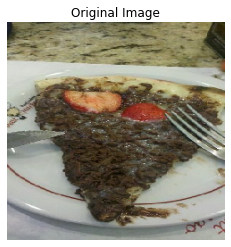

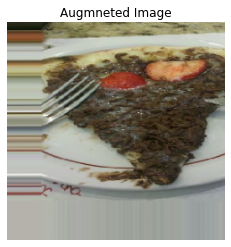

In [60]:
# Show original image and augmented image
import random
random_number = random.randint(0,32) # bath_size = 32
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmneted Image")
plt.axis(False);

In [61]:
# Create a model (same as model_5)
model_6 = Sequential([
      Conv2D(10, 3, activation="relu"),
      MaxPool2D(pool_size=2),
      Conv2D(10, 3, activation="relu"),
      MaxPool2D(),
      Conv2D(10,3, activation="relu"),
      MaxPool2D(),
      Flatten(),
      Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 30s 586ms/step - loss: 0.7576 - accuracy: 0.5833 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 28s 595ms/step - loss: 0.7115 - accuracy: 0.4947 - val_loss: 0.6951 - val_accuracy: 0.4900
Epoch 3/5
47/47 [==============================] - 29s 613ms/step - loss: 0.6922 - accuracy: 0.5507 - val_loss: 0.6875 - val_accuracy: 0.6020
Epoch 4/5
47/47 [==============================] - 27s 579ms/step - loss: 0.7226 - accuracy: 0.5160 - val_loss: 0.6879 - val_accuracy: 0.5020
Epoch 5/5
47/47 [==============================] - 27s 579ms/step - loss: 0.6788 - accuracy: 0.5867 - val_loss: 0.6639 - val_accuracy: 0.5940


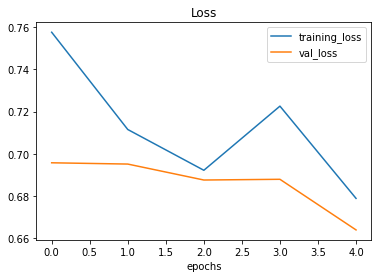

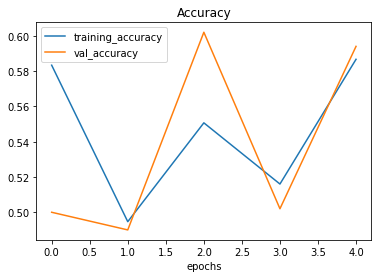

In [66]:
# Check our mdeols training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model.

In [67]:
# Import data and augment it and shuffle from the training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(244,244),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [68]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
      Conv2D(10, 3, activation="relu", input_shape=(244,244,3)),
      MaxPool2D(),
      Conv2D(10, 3, activation="relu"),
      MaxPool2D(),
      Conv2D(10,3, activation="relu"),
      MaxPool2D(),
      Flatten(),
      Dense(1, activation="sigmoid")
])

In [69]:
# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 30s 620ms/step - loss: 0.6750 - accuracy: 0.5873 - val_loss: 0.5912 - val_accuracy: 0.6600
Epoch 2/5
47/47 [==============================] - 27s 581ms/step - loss: 0.5773 - accuracy: 0.7007 - val_loss: 0.4282 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 29s 618ms/step - loss: 0.5526 - accuracy: 0.7167 - val_loss: 0.4115 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 27s 579ms/step - loss: 0.5263 - accuracy: 0.7413 - val_loss: 0.4009 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 27s 581ms/step - loss: 0.5051 - accuracy: 0.7627 - val_loss: 0.3568 - val_accuracy: 0.8500


**Note**: When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn featrues across a wide array of images.

### Step 7: Repeat until satisfied

We can improve our model:
1. Increase the number of model layers (e.g add more `Conv2D`/`MaxPool2D` layers)
2. Increase the number of filters in each convolutional layer (e.g from 10 to 32 or even 64)
3. Train for longer (more epochs)
4. Find an idal learning rate
5. Get more data
6. Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case.

## Making a Prediction with our trained model on our own custom data

In [70]:
# Classes we're working with 
print(class_names)

['pizza' 'steak']


In [73]:
# View our example image
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")

--2022-05-10 05:55:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2022-05-10 05:55:32 (48.8 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



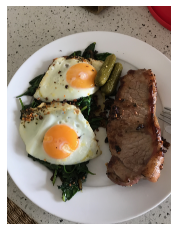

In [74]:
plt.imshow(steak)
plt.axis(False);

In [75]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [76]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

**Note**: When you train a neural network and you want to make a prediction with it on your own custom data, it's important than your own custom data (or new data) is preprocessed into the same format as the data your model was trained on

In [77]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=244):
  """
  Reads the image from filename, and turns it into a tensor,
  reshapes it (img_shape, img_shape, colour_channels)
  """

  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor 
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (normalize)
  img = img/255.
  
  return img

In [78]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(244, 244, 3), dtype=float32, numpy=
array([[[0.62829334, 0.61260706, 0.5694698 ],
        [0.6673293 , 0.6408105 , 0.5997305 ],
        [0.6288645 , 0.61317825, 0.56611943],
        ...,
        [0.5279978 , 0.05740957, 0.09270369],
        [0.5383952 , 0.07957173, 0.11094428],
        [0.5240058 , 0.07302541, 0.1004764 ]],

       [[0.6354672 , 0.6197809 , 0.57664365],
        [0.6364191 , 0.62073284, 0.573674  ],
        [0.6332691 , 0.6175828 , 0.570524  ],
        ...,
        [0.5269163 , 0.05632809, 0.09162221],
        [0.5549276 , 0.08433936, 0.11963347],
        [0.52707314, 0.06824964, 0.09962219]],

       [[0.6360334 , 0.62034714, 0.5732883 ],
        [0.6626118 , 0.6390824 , 0.59202355],
        [0.65419877, 0.6377974 , 0.5907386 ],
        ...,
        [0.5446726 , 0.07408439, 0.111761  ],
        [0.53613055, 0.07730698, 0.10867953],
        [0.5340747 , 0.06348649, 0.0987806 ]],

       ...,

       [[0.56892025, 0.4865673 , 0.37522048],
        [0.06

In [81]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.8579711]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outpus a prediction probability.

In [80]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [82]:
# We can index the predicted class by rounding the prediction probabiltiy and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [83]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

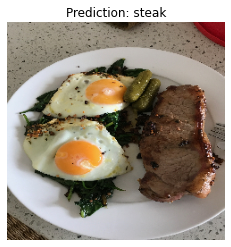

In [84]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

In [85]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pizza = mpimg.imread("03-pizza-dad.jpeg")

--2022-05-10 06:12:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.03s   

2022-05-10 06:12:38 (89.1 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



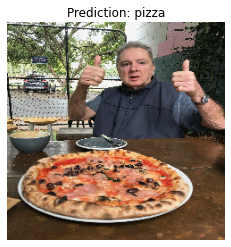

In [86]:
# Test our model on a custom image
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi-class Image Classification TBC